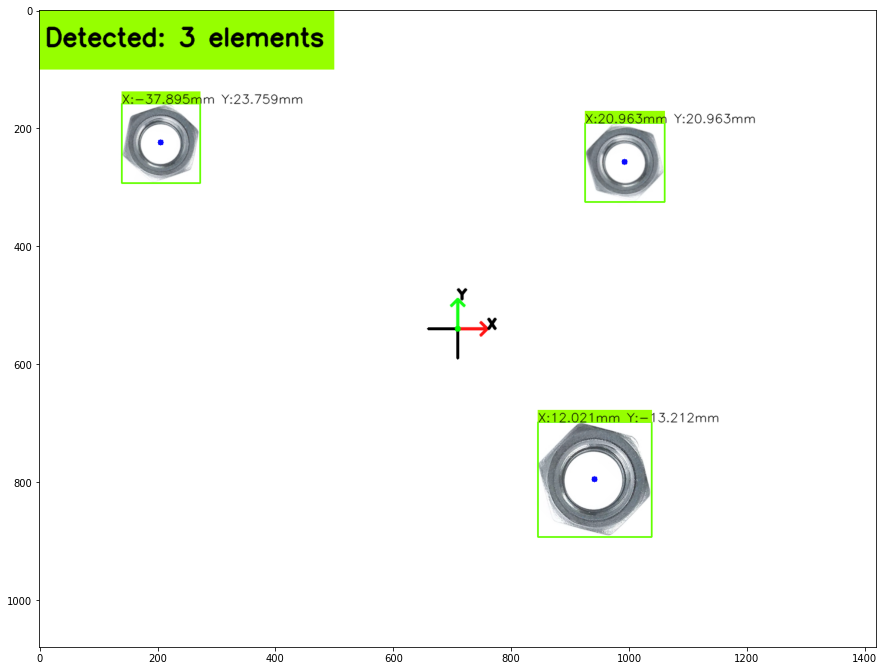

(<matplotlib.image.AxesImage at 0x7f3c3cce6f40>, None)

In [1]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
import math, os
plt.rcParams["figure.figsize"]=15, 15

def ratio(width):
    size = 10
    ratio = size/width
    return ratio

def center():
    shape = img.shape
    h_h = int(img.shape[1]/2)
    h_w = int(img.shape[0]/2)
    return (h_h, h_w)

def cross():
    cv.arrowedLine(img, (center()[0], center()[1]), (center()[0], center()[1]-50), (20,255,20), 3, cv.LINE_AA, 0, 0.3)
    cv.arrowedLine(img, (center()[0], center()[1]), (center()[0]+50, center()[1]), (255,20,20), 3, cv.LINE_AA, 0, 0.3)
    cv.line(img, (center()[0]-50, center()[1]), (center()[0], center()[1]), (0,0,0), 3)
    cv.line(img, (center()[0], center()[1]), (center()[0], center()[1]+50), (0,0,0), 3)
    cv.putText(img, "X", (center()[0]+50, center()[1]), cv.FONT_HERSHEY_SIMPLEX, 0.8, (0,0,0), 3, cv.LINE_AA)
    cv.putText(img, "Y", (center()[0], center()[1]-50), cv.FONT_HERSHEY_SIMPLEX, 0.8, (0,0,0), 3, cv.LINE_AA)
    return img

img = cv.imread('/home/dawid/repos/OpenCV-Features/images/screws/screws.jpg')
img_gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
ret,thresh = cv.threshold(img_gray, 251, 255,0)

contours, hier = cv.findContours(thresh, cv.RETR_TREE, cv.CHAIN_APPROX_NONE)
val = []
for c in contours:
    area = cv.contourArea(c)
    if area > 9000 and area < 40000:
        (x1,y1,w1,h1) = cv.boundingRect(c)
        cv.rectangle(img, (x1,y1), (x1+w1,y1+h1), (100, 255, 0), 2)
        M = cv.moments(c)
        cX = int(M["m10"] / M["m00"])
        cY = int(M["m01"] / M["m00"])
        cv.circle(img, (cX, cY), 5, (10,10,255), -1)
        x = round((cX - center()[0]) * ratio(w1), 3)
        y = round((cY - center()[1]) * ratio(w1), 3)
        y = y * -1
        cv.rectangle(img, (x1,y1), (x1+w1,y1-20), (150, 255, 0), -1)
        cv.putText(img, 'X:%s'%x+"mm"+" Y:%s"%y+"mm", (x1, y1), cv.FONT_HERSHEY_SIMPLEX, 0.7, (0,0,0), 1, cv.LINE_AA)
        val.append(x1)

if len(val) != 0:
    cv.rectangle(img, (0,0), (500, 100), (150, 255, 0), -1)
    cv.putText(img, "Detected: "+"%s"%len(val)+" elements", (10, 60), cv.FONT_HERSHEY_SIMPLEX, 1.4, (0,0,0), 3, cv.LINE_AA)
elif len(val) == 0:
    cv.rectangle(img, (0,0), (500, 100), (255, 150, 0), -1)
    cv.putText(img, "Detected: 0 elements", (10, 60), cv.FONT_HERSHEY_SIMPLEX, 1.4, (0,0,0), 3, cv.LINE_AA)

# Draw cross
cross()

cv.circle(img, center(), 5, (0,255,0), -1)        
plt.imshow(img), plt.show()